# Building Blocks

### Jupyter Notebook
Jupyter Notebook is one of the most popular development environments for data scientists. As the name implies, it's meant to be a notebook of sorts where you can quickly jot down ideas, experiment, and see results. It's not typically used for production although there are projects available aim to make notebooks accessible in production environments.

---
A notebook contains individual cells which can be used either for an executable block of code or markdown enabled text for notes. Each cell can be toggled between Code and Markdown from the menu. 

This cell is set to Markdown and can be formatted with **bold**, *italic*, <font color="blue">colors</font>, etc. This allows for creation of beautifully documented live experimentation and analysis. To view in Markdown mode, highlight the cell, and click "run selected cells and advance" button on the top menu or by using `SHIFT`+`RETURN` on your keyboard. Double click anywhere in the cell to toggle back to edit mode.

For more information on Markdown https://www.markdownguide.org/cheat-sheet/

In [ ]:
##This is a code cell used to create and execute blocks of python code. To execute this code and view output, select and run this cell.

# Use the print statement to show output
print("hello world")

# Print can also be used with functions
foo = "hello"
print(" ".join([foo, "world"]))

# Not just for strings
print(1+3)

# The last line to be evaluated will also be shown in the output
f'The length of foo is {len(foo)}'

## Notes
# You can change the code and rerun it to see any changed output.
# You can right click inside the cell for options, including "clear output"

Variables set in a cell are available throughout the notebook, not just the cell in which they are created. However, individual cells do not have to be run from top to bottom or in any certain order, so the variable will only be available if the cell has been ran/executed in the current session.

Run the cell below and you will see that `foo` can be used, but trying to access `bar` will throw an error since it has yet to be defined.

In [ ]:
print(foo)
print(bar)

Now run the cell below and then rerun the one above and see that `bar` is now available

In [ ]:
bar = "world"

This was a quick and relatively shallow overview of Jupyter Notebooks, but it should be enough to help you start navigating and getting hands-on with the fun stuff. To find out more, visit https://jupyter.org/

### NumPy

NumPy is heavily used in python when dealing with data science and machine learning projects. It's a super efficient tool for creating and processing multi dimensional arrays.

Below is an example of a simple, one dimensional array

In [ ]:
import numpy as np

simple_array = np.array([5, 10])
print(f'simple array contents: {simple_array}')
print(f'simple array shape: {simple_array.shape}')
print(f'simple array cell content by index: {simple_array[0]}')

Numpy's strength lies within it's ability to process large, multi-dimensional arrays

In [ ]:
import string
multi_array = np.array([list(string.ascii_lowercase), list(range(26))], dtype=object)
print(f'multi array contents: {multi_array}')
print(f'multi array shape: {multi_array.shape}')
print(f'multi array cell content by index: {multi_array[0][0]}')

- Numpy arrays are optimized for memory usage and size is defined up at declaration. If you want to append an unknown amount of items dynamically, a native Python structure may be a better fit
- Numpy can math

Numpy is very powerful. Find more info https://numpy.org/doc/stable/user/quickstart.html#the-basics

In [ ]:
#define array up front with empty or zeros
#do some math on array 1
#numpy array 1 * numpy array 2

### Pandas

Pandas is like a small, in-memory database that allows for processing data. Internally, it utilizes numpy, but adds some convenient query and data access. One very common usage is to import and export CSV files to and from a Pandas DataFrame. Pandas has a domain specific language to itself, so you should keep the documentation handy! https://pandas.pydata.org/docs/reference/

The two main Pandas data structures are Series and DataFrame. A Series is a labeled one-dimensional array and a DataFrame is a two dimensional array with rows, columns, and labels. All individual rows and columns of a DataFrame are made up of individual Series.

In [ ]:
import pandas as pd

In [ ]:
#Create series from Lists
egeeks = ['Thomas','Rich','Craig','Dan','Ed']
size_srs = pd.Series([12,8,10,8,13],index=egeeks, name='Ring Size')
print(size_srs)
print(type(size_srs))
#access series data by index 
print(f"Rich's ring size is {size_srs['Rich']}")

In [ ]:
#Create series from Dictionary
state_srs = pd.Series({"Thomas": "Indiana", "Rich": "Pennsylvania", "Craig": "North Rhine-Westphalia", "Dan": "New York", "Ed":"Indiana"}, name="State")
print(state_srs)
print(type(state_srs))
print(f"Thomas lives in {state_srs['Thomas']}")

In [ ]:
#Concatenate multiple series as columns (axis=1) to create new dataframe
egeeks_df = pd.concat([ring_size_srs, state_srs], axis=1) 
print(egeeks_df)
print(type(egeeks_df))
print(f"Rich lives in {egeeks_df.loc['Rich']['State']}")

In [ ]:
#individual row of a DataFrame is a Series
print(egeeks_df.loc['Thomas'])
print(type(egeeks_df.loc['Thomas']))

In [ ]:
#individual column of a DataFrame is a Series
print(egeeks_df['Ring Size'])
print(type(egeeks_df['Ring Size']))

In [ ]:
#add column from List
egeeks_df['City'] = ['Jasper', 'York', 'Lippstadt', 'New York', 'New Albany']
print(egeeks_df)

In [ ]:
#add column with single value
egeeks_df['Favorite Language'] = 'ABAP'
print(egeeks_df)

In [ ]:
egeeks_df.to_csv('egeeks_data.csv', index_label='Name') #give index a label for csv column

In [ ]:
egeeks_df = None
egeeks_df = pd.read_csv('egeeks_data.csv', index_col='Name') #specify which column to use as index
print(egeeks_df)

In [ ]:
print(egeeks_df.loc[egeeks_df['State'] == 'Indiana'])
print(egeeks_df.loc[egeeks_df['Ring Size'] > 8])

# Data Science

1. Load data - find existing dataset and keep it in folder. WIth Bindr, supposedly can load in a notebook and data files directly from Github
0. Preprocess Data bigrams, tokenization (should this be a separate step or maybe included in the pipeline properly)
0. Vectorize Data (Data Science alert -- vectors) - high level on custom vectorization but maybe use glove?
0. Train - split
0. Save model as pipeline
0. Load model as pipeline
0. Predict on different dataset
0. Confusion Matrix
0. Logistic regression chart?

Yoda / Not Yoda
https://www.kaggle.com/stefanocoretta/yoda-speech-corpus

The purpose of our tutorial is to demystify ML/NLP, so we will use the most simple use cases as possible. There is many nuances and advanced techniques for increasing accuracy, including methods for preprocessing, tokenization, vectorization, building models, and the list goes on. 

scikit-learn tutorial "Working With Text Data"
https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### Load and Prep Data

In [ ]:
sw_df = pd.read_csv('yoda-corpus.csv')
print(len(sw_df))

In [ ]:
#lets take a peek at the first 20 lines of the dataset
sw_df[0:20] 

In [ ]:
#Let's take out any rows we won't be using
yoda_df = sw_df.loc[sw_df['component'] == 'character']
print(len(yoda_df))

In [ ]:
#how many lines with Yoda and Not Yoda. We can ignore lines where component column != 'character' since they aren't actual spoken movie lines
print(f"Yoda:", len(yoda_df.loc[yoda_df['character'] == 'YODA']))
print(f"Not Yoda:", len(yoda_df.loc[yoda_df['character'] != 'YODA']))

In [ ]:
#For simplicity, let's also just use the columns we need for processing
yoda_df = yoda_df[['character', 'text']]
yoda_df[0:20]

In [ ]:
#Evaluating a Series of data will return a Series of booleans
print((yoda_df['character'] == 'YODA')[0:20])

In [ ]:
#Add a column to specify boolean value if character is yoda or not yoda. We will see why we are doing this in a later step
yoda_df['is_yoda'] = (yoda_df['character'] == 'YODA').astype(int)
yoda_df[0:20]
#How cool was that?

### Vectorization
TODO: SUMMARIZE

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors:

TF-IDF (Term Frequency times Inverse Document Frequency) is a way of adjusting the importance or weight of individual terms in relation to all of the terms and frequencies of the entire dataset. To do this, it takes word/term counts from our count_vectorizer and downscaling:
- TF: Adjusting importance of a term by dividing it's frequency by total number of terms in the data 
- IDF: Lowering importance of very common words that occur very frequently in both Yoda and Not Yoda data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
#stop words are common words that deserve no weighting like "a"
tfidf_vectorizer.fit(yoda_df['text'])

In [ ]:
#What does it look like tokenized?
yoda_line = yoda_df.iloc[1]['text']
print("Original text:", yoda_line)
print("Tokenized text:", tfidf_vectorizer.build_tokenizer()(yoda_line))
print("Vectorized representation of text\n", tfidf_vectorizer.transform([yoda_line,]))

### (PROBABLY DELETE) Side Note: Scikit-Learn Object Interface
Don't want to spend a lot of time, but want to point out that you may have noticed that both `CountVectorizer` and `TfidfVectorizer` have the same method `fit_transform`. While the goal of this tutorial is to serve as a general ML primer and not a Scikit-learn lesson, it's still important to note that most Scikit-learn objects share common interfaces and standards, which come in very handy when dealing with the many objects in the toolchain and also if you want to create your own custom object.  

Scikit-learn Glossary of Common Terms and API Elements

https://scikit-learn.org/stable/glossary.html

### Train a classifier model
Time to get into the fun stuff, training a machine learning model! Lets train a simple Logistic Regression classifier.

In [ ]:
elon_df = pd.read_csv('data_elonmusk.csv', encoding='latin1')
print('Elon Tweets and Retweets:', len(elon_df))
elon_df[0:20]

In [ ]:
#create a new dataframe with only original tweets
elon_clean_df = pd.DataFrame(elon_df.loc[elon_df['Retweet from'].isnull()]['Tweet'].tolist(), columns=['text',])
elon_clean_df['who said it'] = 'Elon Musk'
print('Elon Tweets', len(elon_clean_df))
elon_clean_df[0:20] 

In [ ]:
elon_clean_df['dialogue'] = elon_clean_df['text']
#remove URLs using regex
elon_clean_df['dialogue'] = elon_clean_df['dialogue'].str.replace(r"http\S+", "")
elon_clean_df['dialogue'] = elon_clean_df['dialogue'].str.replace(r"http", "")
#remove @ mentions using regex
elon_clean_df['dialogue'] = elon_clean_df['dialogue'].str.replace(r"@\S+", "")
#replace any line breaks with spaces 
elon_clean_df['dialogue'] = elon_clean_df['dialogue'].str.replace(r"\n", " ")
#convert to lowercase
# elon_clean_df['text_clean'] = elon_clean_df['text_clean'].str.lower()
elon_clean_df[0:20]

In [ ]:
hope_df = pd.read_csv('SW_EpisodeIV.txt', delim_whitespace=True, names=["id","character","dialogue"], index_col="id", skiprows=[0,])
emp_df = pd.read_csv('SW_EpisodeV.txt', delim_whitespace=True, names=["id","character","dialogue"], index_col="id", skiprows=[0,])
jedi_df = pd.read_csv('SW_EpisodeVI.txt', delim_whitespace=True, names=["id","character","dialogue"], index_col="id", skiprows=[0,])
sw_df = pd.concat([hope_df, emp_df, jedi_df]) #combine into one dataframe
print('Total Star Wars movie lines: ', len(sw_df))
sw_df[0:20]

In [ ]:
sw_df['who said it'] = 'Star Wars'
sw_df[0:20]

In [ ]:
all_df = pd.concat([elon_clean_df[['dialogue', 'who said it']], sw_df[['dialogue', 'who said it']]])
all_df[0:20]
all_df[0:-20] #view last 20 lines

In [426]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
#stop words are common words that deserve no weighting like "a"
tfidf_vectorizer.fit(all_df['dialogue'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [427]:
#Let's hold back some data for testing our model using a handy sklearn method that will shuffle and split our data
from sklearn.model_selection import train_test_split
all_df_train, all_df_test = train_test_split(all_df, test_size=0.20)
print("All data:", len(all_df))
print("Train data:", len(all_df_train))
print("Test data:", len(all_df_test))
all_df_test[0:20]

All data: 5216
Train data: 4172
Test data: 1044


,dialogue,who said it
2317,Hyperloop Alpha at and,Elon Musk
2598,Orbit raising burn successful. Dragon back on ...,Elon Musk
2045,Falcon/Dragon launch punted to early Jan. Need...,Elon Musk
2620,"Genius move ? Well, to be fair, they did use ...",Elon Musk
2174,Tesla US business leasing program went live to...,Elon Musk
1337,"true, good point",Elon Musk
441,I felt a great disturbance in the Force... as ...,Star Wars
821,Luke.,Star Wars
225,Just received verbal govt approval for The Bor...,Elon Musk
406,"I beg your pardon, General Solo, but that just...",Star Wars


In [430]:
#Vectorize our training data just as we did in previous step
dialogue_tfidf_train = tfidf_vectorizer.transform(all_df_train['dialogue'])
dialogue_tfidf_train 
#You can see that the result is a matrix of 224 lines of vectorized data, one for each line in our training data

<4172x6619 sparse matrix of type '<class 'numpy.float64'>'
	with 23468 stored elements in Compressed Sparse Row format>

In [433]:
#train our classifier model
from sklearn.naive_bayes import MultinomialNB
sw_elon_clf = MultinomialNB().fit(dialogue_tfidf_train, all_df_train['who said it'])

In [513]:
#predict against our test data 
dialogue_tfidf_test = tfidf_vectorizer.transform(all_df_test['dialogue'])
all_df_test['who said it prediction'] = sw_elon_clf.predict(dialogue_tfidf_test)
all_df_test[0:20]

/Users/ewh/anaconda2/envs/eai36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dialogue,who said it,who said it prediction
2317,Hyperloop Alpha at and,Elon Musk,Elon Musk
2598,Orbit raising burn successful. Dragon back on ...,Elon Musk,Elon Musk
2045,Falcon/Dragon launch punted to early Jan. Need...,Elon Musk,Elon Musk
2620,"Genius move ? Well, to be fair, they did use ...",Elon Musk,Elon Musk
2174,Tesla US business leasing program went live to...,Elon Musk,Elon Musk
1337,"true, good point",Elon Musk,Elon Musk
441,I felt a great disturbance in the Force... as ...,Star Wars,Star Wars
821,Luke.,Star Wars,Star Wars
225,Just received verbal govt approval for The Bor...,Elon Musk,Elon Musk
406,"I beg your pardon, General Solo, but that just...",Star Wars,Star Wars


In [442]:
#run metrics
from sklearn import metrics
print("Accuracy score:", metrics.accuracy_score(all_df_test['who said it'], all_df_test['who said it prediction']) * 100)

Accuracy score: 90.13409961685824


In [487]:
#90% accuracy not bad! Let's take a quick peek at a confusion matrix to see a bit more about our accuracy
cm = metrics.confusion_matrix(all_df_test['who said it'], all_df_test['who said it prediction'], labels=['Elon Musk', 'Star Wars'])
cm

array([[489,  49],
       [ 54, 452]])

<function matplotlib.pyplot.show(*args, **kw)>

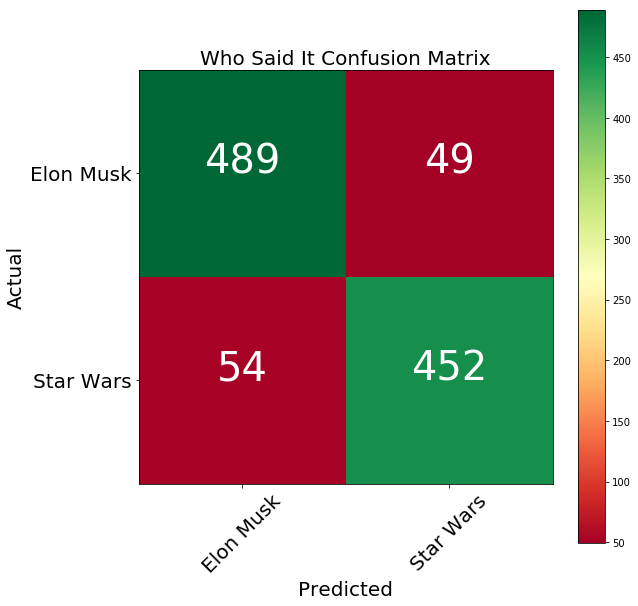

In [514]:
#not easy to read...notebooks have some nice UI capabilities. Lets make it visual using matplotlib
import matplotlib.pyplot as plt
from itertools import product

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap="RdYlGn")
plt.tight_layout()
plt.colorbar()

plt.title('Who Said It Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

classes = ['Elon Musk', 'Star Wars']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, fontsize=20, rotation=45)
plt.yticks(tick_marks, classes, fontsize=20)

#iterate through matrix and plot values
for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white", fontsize=40)
    
plt.show

The confusion matrix shows that there were:
* 489 predictions where the actual and predicted value was Elon Musk
* 452 predictions where both the actual and predicted value was Star Wars
* 49 predictions where the actual value was Elon Musk but the predicted value was Star Wars
* 54 predictions where the actual value was Star Wars but the predicted value was Elon Musk

### Pipelines
Once we build our model, we will probably want to use it to predict and classify future lines. It's important that we preprocess and vectorize any future data the same way in which it was built before feeding it in for classification. Scikit-learn provides the concept of pipelines that are objects that can store all the necessary steps to process data.

In [515]:
test_line = "may the force be with you"
test_line_tfidf = tfidf_vectorizer.transform([test_line,])
sw_elon_clf.predict(test_line_tfidf)

array(['Star Wars'], dtype='<U9')

In [516]:
#That is not only a pain, but what if we don't know where to find the vectorizer or use the wrong one. 
#To solve this, lets package them up together as steps in a pipeline
from sklearn.pipeline import Pipeline
sw_elon_clf_pipe = Pipeline([
    ('vect', tfidf_vectorizer),
    ('clf', sw_elon_clf),
])

In [517]:
#now we can predict and let the pipeline do the work of processing the input into all the necessary steps
sw_elon_clf_pipe.predict([test_line,])

array(['Star Wars'], dtype='<U9')

In [537]:
#Lets save our model to use later
from sklearn.externals import joblib
joblib.dump(sw_elon_clf_pipe, 'sw_elon_model.pkl')

['sw_elon_model.pkl']

In [541]:
#Let's load it back up and run some fun tests
sw_elon_clf_pipe = joblib.load('sw_elon_model.pkl')
test_lines = [
    'may the force be with you', 
    'i love tesla', 
    'i am your father', 
    'seagulls stop it now', 
    'the next SAP teched should be on Mars',
    'come to the dark side, we have cookies',
]

test_predictions = sw_elon_clf_pipe.predict(test_lines)

test_results_df = pd.DataFrame({"Text": test_lines, "Prediction": test_predictions})
test_results_df

,Text,Prediction
0,may the force be with you,Star Wars
1,i love tesla,Elon Musk
2,i am your father,Star Wars
3,seagulls stop it now,Star Wars
4,the next SAP teched should be on Mars,Elon Musk
5,"come to the dark side, we have cookies",Star Wars


There you have it, Elon Musk loves SAP TechEd and Star Wars loves cookies.

### Conclusion

There are many models available in Scikit-Learn and that doesn't even compare to the different types of algorithms and models available out in the bigger world. The word science part of Data Science is very accurate due to the research, development, implement, tweak, repeat nature of ML. 